In [16]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [11]:
products_csv = "/kaggle/input/assignment/data/Products.csv"
customers_csv = "/kaggle/input/assignment/data/Customers.csv"
transactions_csv = "/kaggle/input/assignment/data/Transactions.csv"

products = pd.read_csv(products_csv)
customers = pd.read_csv(customers_csv)
transactions = pd.read_csv(transactions_csv)

In [12]:
customer_transactions = transactions.merge(customers, on='CustomerID')
print(customer_transactions.shape,"\t", customer_transactions.columns)

(1000, 10) 	 Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate'],
      dtype='object')


In [13]:
# Aggregating Transaction Data by Customer
customer_transactions = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  
    'Quantity': 'sum',  
    'ProductID': 'nunique',  # unique products purchased
    'TransactionID': 'count'  
}).reset_index()

# Merging with customer information on Customer_ID
customer_data = customers.merge(customer_transactions, on='CustomerID')

# One-hot encode categorical features (Region)
encoder = OneHotEncoder(sparse_output=False)
region_encoded = encoder.fit_transform(customer_data[['Region']])

# combining encoded region data with other features
customer_features = np.hstack([region_encoded, customer_data[['TotalValue', 'Quantity', 'ProductID', 'TransactionID']].values])

In [17]:
numerical_features = ['TotalValue', 'Quantity', 'ProductID', 'TransactionID']

categorical_features = ['Region'] 

encoder = OneHotEncoder(sparse_output=False)
categorical_encoded = encoder.fit_transform(customer_data[categorical_features])

scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(customer_data[numerical_features])

features = np.hstack([numerical_scaled, categorical_encoded])

k = 4
kmeans = KMeans(n_clusters=k, random_state=10)
customer_data['Cluster'] = kmeans.fit_predict(features)

db_index = davies_bouldin_score(features, customer_data['Cluster'])

print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 1.32


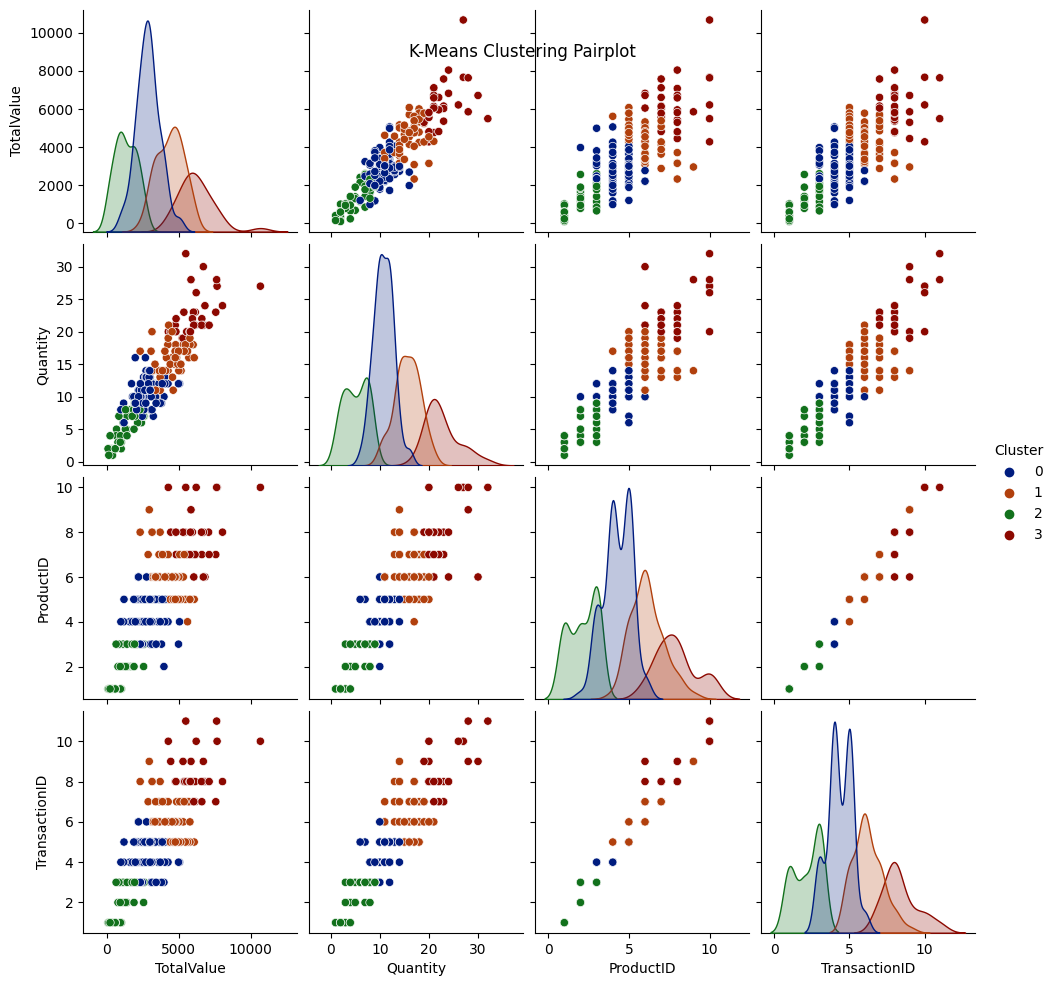

In [18]:
sns.pairplot(customer_data, hue='Cluster', diag_kind='kde', palette='dark')
plt.suptitle('K-Means Clustering Pairplot', y=0.95)
plt.show()

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)